In [1]:
import arxivscraper
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
scraper = arxivscraper.Scraper(category = 'cs', date_from='2021-12-20',date_until='2022-01-06')

In [2]:
output = scraper.scrape()

fetching up to  1000 records...
fetching up to  2000 records...
fetching up to  3000 records...
fetching up to  4000 records...
fetching up to  5000 records...
fetching up to  6000 records...
fetching is completed in 65.7 seconds.
Total number of records 5221


In [3]:
output

[{'title': 'disproof of the list hadwiger conjecture',
  'id': '1110.2272',
  'abstract': 'the list hadwiger conjecture asserts that every $k_t$-minor-free graph is $t$-choosable. we disprove this conjecture by constructing a $k_{3t+2}$-minor-free graph that is not $4t$-choosable for every integer $t\\geq 1$.',
  'categories': 'math.co cs.dm',
  'doi': '10.37236/719',
  'created': '2011-10-11',
  'updated': '',
  'authors': ['jános barát', 'gwenaël joret', 'david r. wood'],
  'affiliation': [],
  'url': 'https://arxiv.org/abs/1110.2272'},
 {'title': 'nonrepetitive colourings of planar graphs with $o(\\log n)$ colours',
  'id': '1202.1569',
  'abstract': 'a vertex colouring of a graph is \\emph{nonrepetitive} if there is no path for which the first half of the path is assigned the same sequence of colours as the second half. the \\emph{nonrepetitive chromatic number} of a graph $g$ is the minimum integer $k$ such that $g$ has a nonrepetitive $k$-colouring. whether planar graphs have bou

In [27]:
cols = ('id', 'title', 'categories', 'abstract', 'doi', 'created', 'updated', 'authors')
df = pd.DataFrame(output,columns=cols)

In [28]:
df

,id,title,categories,abstract,doi,created,updated,authors
0,1110.2272,disproof of the list hadwiger conjecture,math.co cs.dm,the list hadwiger conjecture asserts that ever...,10.37236/719,2011-10-11,,"[jános barát, gwenaël joret, david r. wood]"
1,1202.1569,nonrepetitive colourings of planar graphs with...,math.co cs.dm,a vertex colouring of a graph is \emph{nonrepe...,10.37236/3153,2012-02-07,2012-02-16,"[vida dujmović, fabrizio frati, gwenaël joret,..."
2,1211.4853,reducing the rank of a matroid,cs.ds cs.dm,we consider the rank reduction problem for mat...,10.46298/dmtcs.2135,2012-11-20,2015-09-05,"[gwenaël joret, adrian vetta]"
3,1303.5942,exact simulation of the ghz distribution,cs.it math.it quant-ph,john bell has shown that the correlations enta...,10.1109/tit.2015.2504525,2013-03-24,2015-05-17,"[gilles brassard, luc devroye, claude gravel]"
4,1310.4716,sostools version 4.00 sum of squares optimizat...,math.oc cs.ms cs.sy,the release of sostools v4.00 comes as we appr...,,2013-10-17,2021-12-27,"[antonis papachristodoulou, james anderson, gi..."
...,...,...,...,...,...,...,...,...
5216,2201.01749,integrability and geometry of the wynn recurrence,nlin.si cs.na math-ph math.mp math.na,we show that the wynn recurrence (the missing ...,,2022-01-05,,"[adam doliwa, artur siemaszko]"
5217,2201.01755,real-time interface control with motion gestur...,cs.hc cs.ai cs.sy eess.sy,capacitive sensing is a prominent technology t...,,2022-01-05,,"[hunmin lee, jaya krishna mandivarapu, nahom o..."
5218,2201.01757,underrepresentation of women in computer syste...,cs.dl,the gender gap in computer science (cs) resear...,,2022-01-05,,"[eitan frachtenberg, rhody d. kaner]"
5219,2201.01760,multi-robot collaborative perception with grap...,cs.ro cs.cv,multi-robot systems such as swarms of aerial r...,,2022-01-05,,"[yang zhou, jiuhong xiao, yue zhou, giuseppe l..."


In [48]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L3-v2')

corpus_embeddings = model.encode(df['title'])


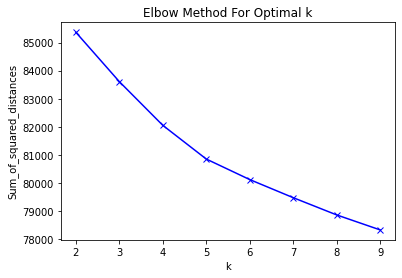

How many clusters do you want to use?
5
                                                  title  cluster
0     [-0.34244344, -0.16908415, 0.26606172, 0.01216...        0
1     [-0.3920539, 0.16003123, 0.038142588, -0.07185...        0
2     [-0.4113662, 0.18379393, 0.08926854, -0.045241...        0
4     [-0.08531967, 0.078226835, -0.05231263, -0.062...        0
6     [-0.21302588, 0.09366271, 0.42902106, -0.06962...        0
...                                                 ...      ...
5209  [0.016933715, 0.010698144, 0.19009843, -0.0724...        0
5211  [-0.06078412, -0.11807112, -0.1136459, 0.04198...        0
5212  [0.0072938413, 0.08625835, -0.19978969, 0.1384...        0
5214  [-0.054754566, 0.33128202, 0.0040885312, -0.08...        0
5216  [0.33877513, -0.02687004, 0.13515179, -0.02431...        0

[1372 rows x 2 columns]
                                                  title  cluster
15    [-0.30591196, -0.27544102, -0.057779722, -0.06...        1
27    [0.059160516, -0.71

In [51]:

def cluster_text(text):
    X = text
    import matplotlib.pyplot as plt
    from sklearn.cluster import KMeans
    Sum_of_squared_distances = []
    K = range(2,10)
    for k in K:
        km = KMeans(n_clusters=k, max_iter=200, n_init=10)
        km = km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    print('How many clusters do you want to use?')
    true_k = int(input())
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
    model.fit(X)

    labels=model.labels_
    clusters=pd.DataFrame(list(zip(text,labels)),columns=['title','cluster'])
    #print(clusters.sort_values(by=['cluster']))

    for i in range(true_k):
        print(clusters[clusters['cluster'] == i])
        
    return
        

cluster_text(corpus_embeddings)